In [1]:
from google.colab import drive
drive.mount('/content/drive')#, force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
train_1 = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/train/1_emb.tsv",delimiter='\t',header=None).values[:,1:-1]
train_2 = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/train/2_emb.tsv",delimiter='\t',header=None).values[:,1:-1]
train_3 = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/train/3_emb.tsv",delimiter='\t',header=None).values[:,1:-1]
train_4 = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/train/4_emb.tsv",delimiter='\t',header=None).values[:,1:-1]

test_1 = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/test/1_emb.tsv",delimiter='\t',header=None).values[:,1:-1]
test_2 = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/test/2_emb.tsv",delimiter='\t',header=None).values[:,1:-1]
test_3 = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/test/3_emb.tsv",delimiter='\t',header=None).values[:,1:-1]
test_4 = pd.read_csv(f"drive/MyDrive/Сертификат/news-dataset/assets/annotated-corpus/test/4_emb.tsv",delimiter='\t',header=None).values[:,1:-1]


In [3]:
import numpy as np

In [4]:
X = np.row_stack((train_1,train_2,train_3,train_4))

In [5]:
X_test = np.row_stack((test_1,test_2,test_3,test_4))

y_test1=np.zeros((test_1.shape[0],1))
y_test2=np.ones((test_2.shape[0],1))
y_test3=np.ones((test_3.shape[0],1))*2
y_test4=np.ones((test_4.shape[0],1))*3
y_test = np.row_stack((y_test1,y_test2,y_test3,y_test4))

In [6]:
y1=np.zeros((train_1.shape[0],1))
y2=np.ones((train_2.shape[0],1))
y3=np.ones((train_3.shape[0],1))*2
y4=np.ones((train_4.shape[0],1))*3
y = np.row_stack((y1,y2,y3,y4))

In [7]:
def confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)

    for true_label, pred_label in zip(y_true, y_pred):
        cm[int(true_label)][int(pred_label)] += 1

    return cm

In [8]:
from statistics import mean
def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

    precision = np.zeros(num_classes, dtype=np.float32)
    recall = np.zeros(num_classes, dtype=np.float32)
    f1_score = np.zeros(num_classes, dtype=np.float32)

    for i in range(num_classes):
        true_positive = confusion_matrix[i, i]
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        false_negative = np.sum(confusion_matrix[i, :]) - true_positive

        precision[i] = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
        recall[i] = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0

        f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

    return [accuracy, mean(precision), mean(recall), mean(f1_score)]

In [2]:
from timeit import default_timer as timer
from sklearn.multiclass import OneVsRestClassifier
all_tests = []
from sklearn import svm
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for clf_type in ["ovr","ovo"]:
        for iter_num in [100,500,1000]:
            name = f"{kernel}_{clf_type}_{iter_num}"
            start = timer()
            if clf_type=="ovr":
                clf = OneVsRestClassifier(svm.SVC(kernel=kernel,max_iter=iter_num),n_jobs=-1)
            else:
                clf = svm.SVC(kernel=kernel,max_iter=iter_num)
            clf.fit(X, y.ravel())
            end = timer()
            test = clf.predict(X_test)
            cm = confusion_matrix(y_test.ravel(),test,4)
            test_res = calculate_metrics(cm)
            test_res.append(end - start)
            print((name,test_res))
            all_tests.append((name,test_res))

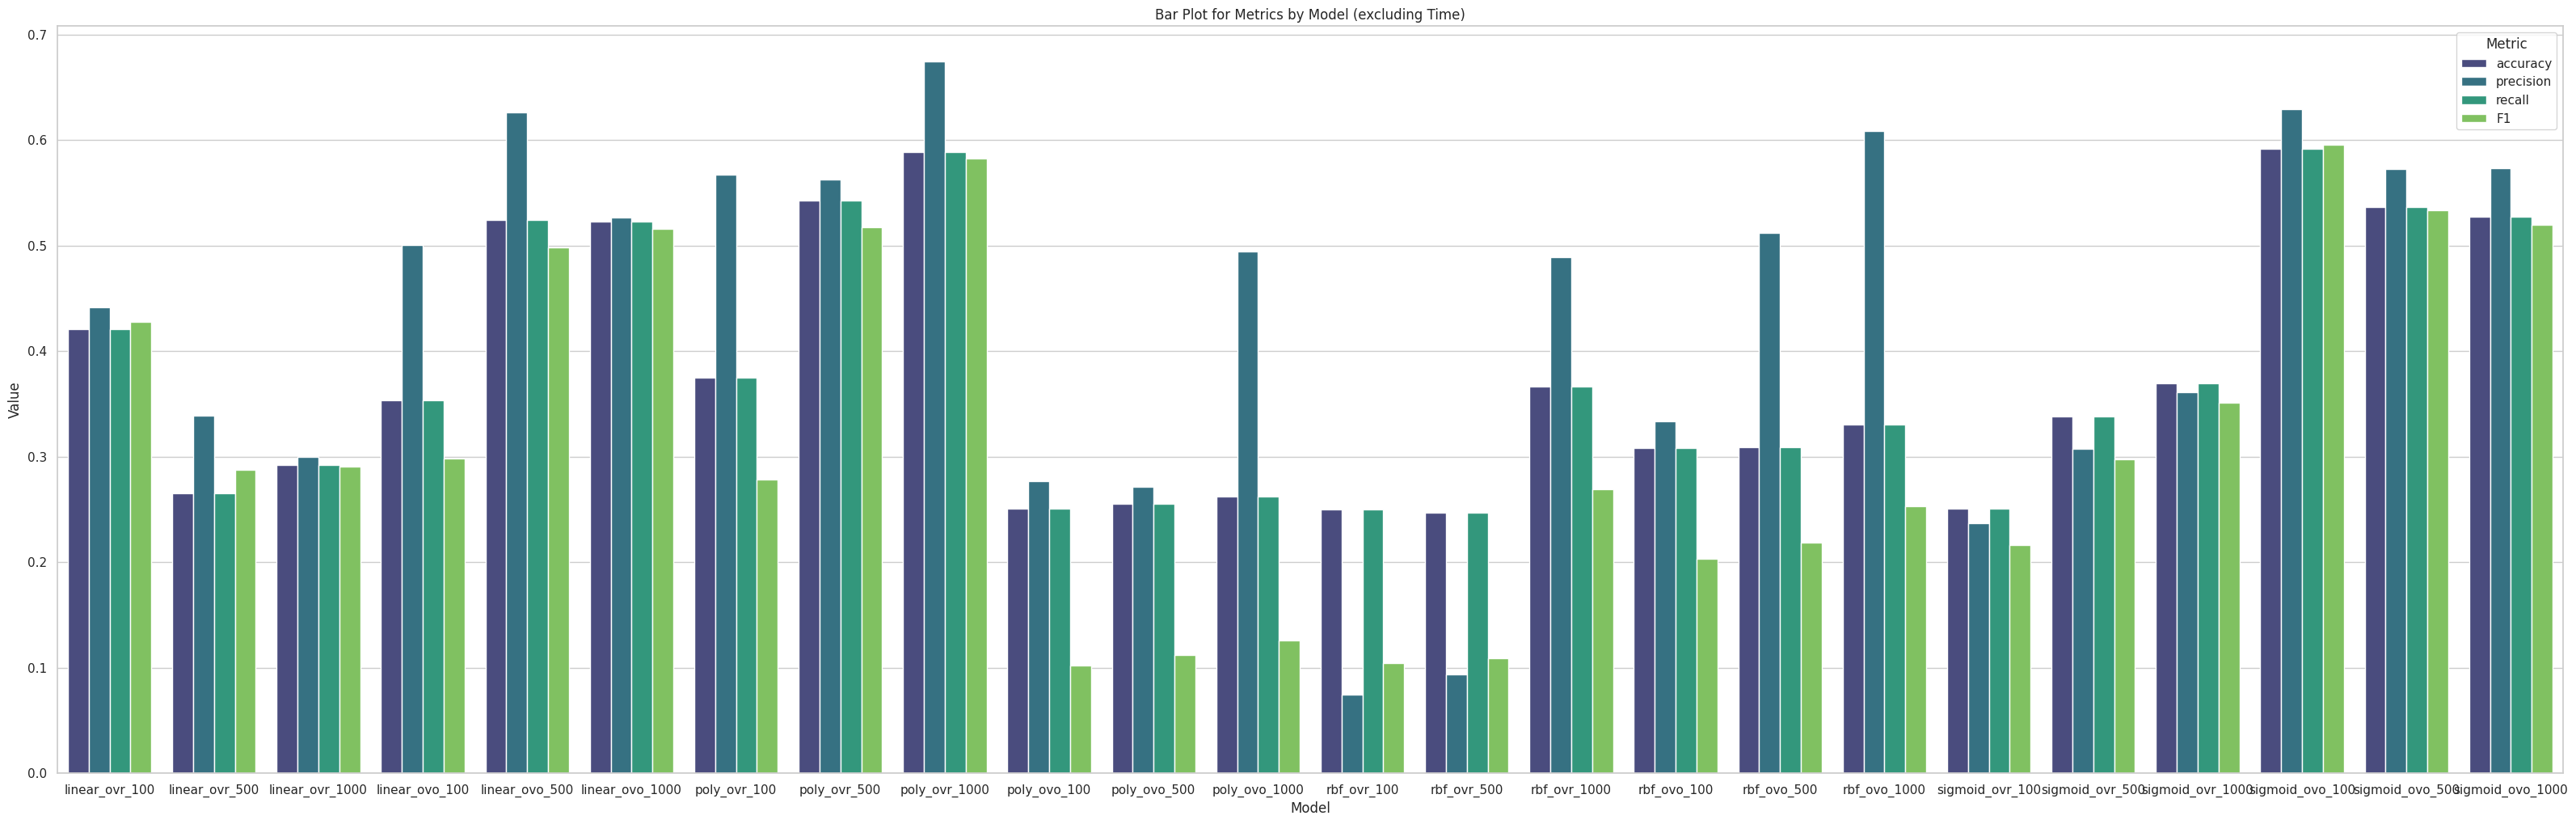

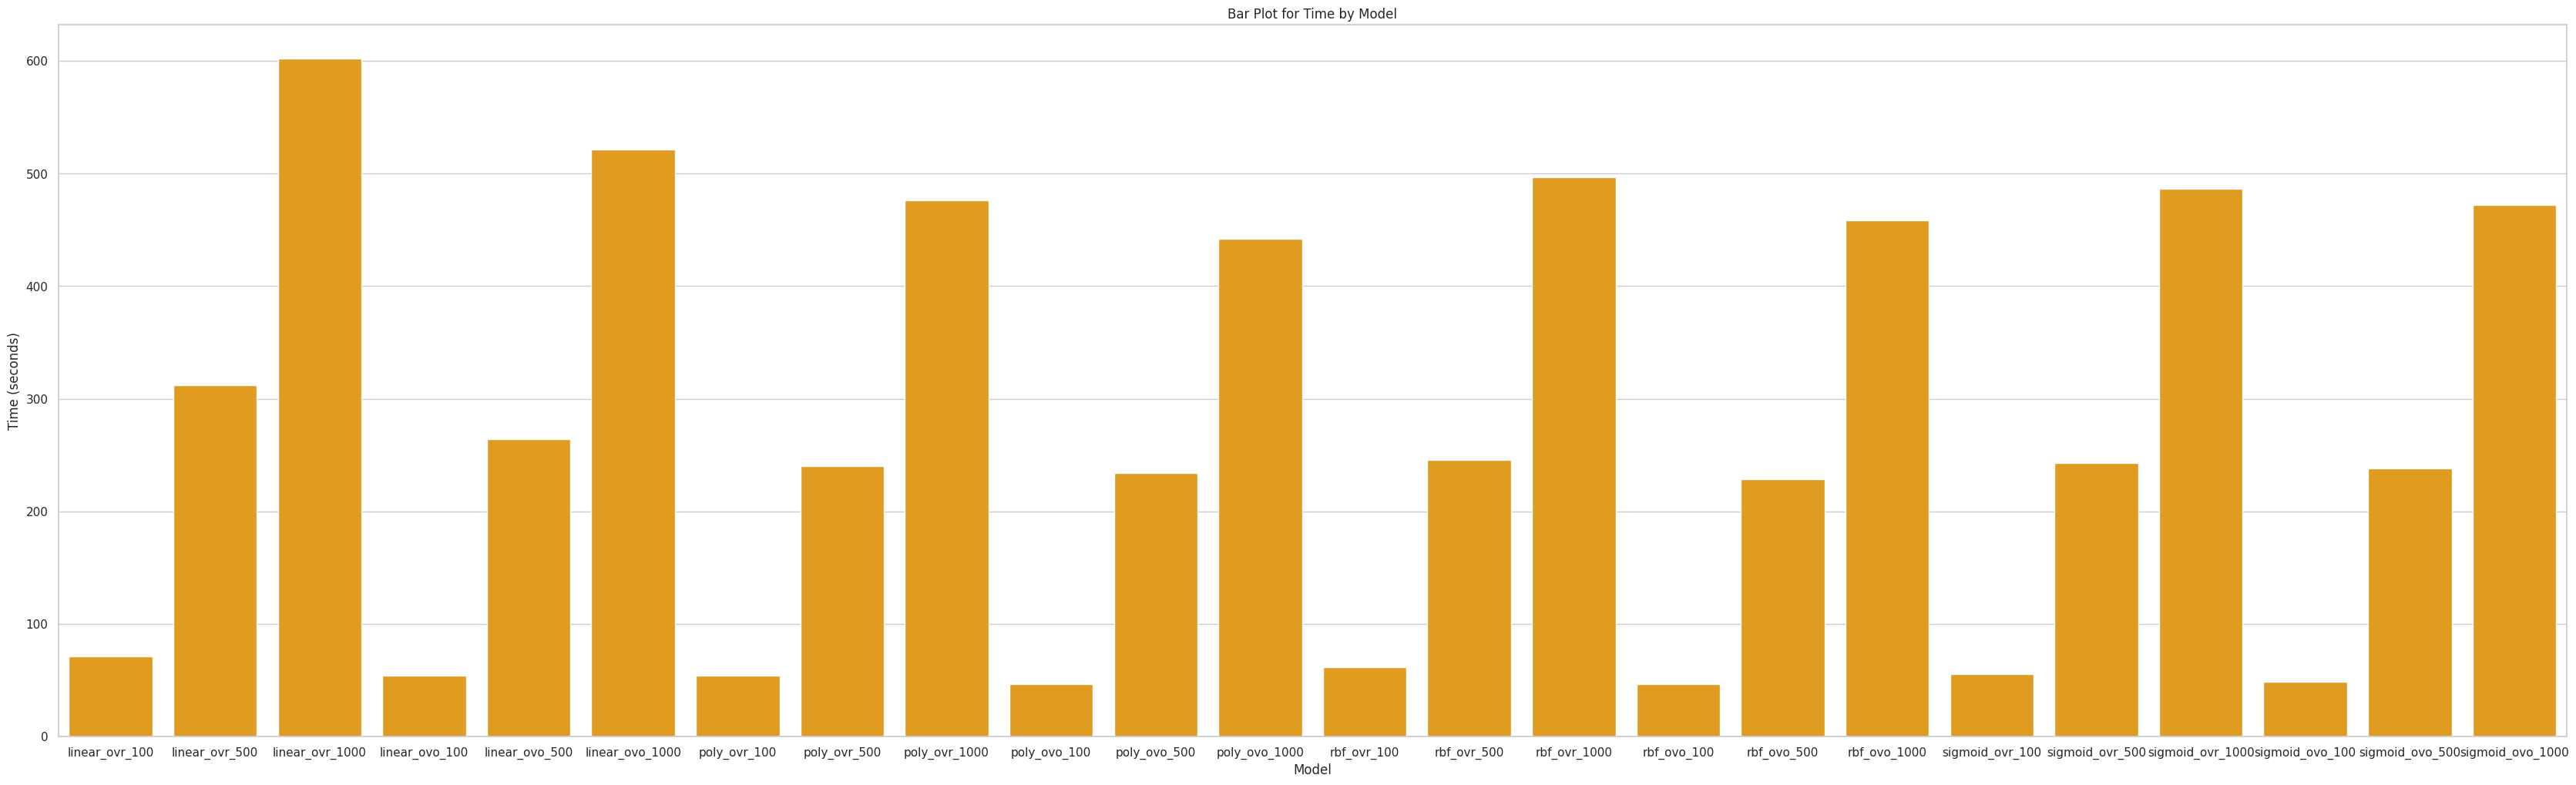

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Given data
data = all_tests

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['Model', 'Metrics'])
df = pd.concat([df, pd.DataFrame(df['Metrics'].to_list(), columns=['accuracy', 'precision', 'recall', 'F1', 'Time'])], axis=1)

# Melt the DataFrame for better plotting with seaborn
df_metrics_melted = pd.melt(df, id_vars=['Model'], value_vars=['accuracy', 'precision', 'recall', 'F1'], var_name='Metric', value_name='Value')

# Set seaborn style
sns.set(style="whitegrid")

# Plot the bar plot for metrics
plt.figure(figsize=(40, 12))
ax1 = sns.barplot(x='Model', y='Value', hue='Metric', data=df_metrics_melted, palette='viridis')
plt.title('Bar Plot for Metrics by Model (excluding Time)')
plt.xlabel('Model')
plt.ylabel('Value')

# Plot the bar plot for time separately
df_time = df[['Model', 'Time']]
plt.figure(figsize=(42, 12))
ax2 = sns.barplot(x='Model', y='Time', data=df_time, color='orange')
plt.title('Bar Plot for Time by Model')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')

plt.show()

In [11]:
clf = OneVsRestClassifier(svm.SVC(kernel='poly',max_iter=5000),n_jobs=-1)
clf.fit(X, y.ravel())
test = clf.predict(X_test)
cm = confusion_matrix(y_test.ravel(),test,4)
test_res = calculate_metrics(cm)
print(test_res)

[0.735781990521327, 0.80132353, 0.735782, 0.74029976]


In [1]:
import numpy as np
from sklearn.decomposition import PCA
from timeit import default_timer as timer
from sklearn.multiclass import OneVsRestClassifier
all_tests = []
from sklearn import svm
results = []
for num_comp in [256,128,64,32,16,8,4,2]:
    for whitten in [True,False]:
        name = f"{num_comp}_{whitten}"
        pca = PCA(n_components=num_comp,whiten=whitten)
        new_X = pca.fit_transform(X)
        new_X_test = pca.transform(X_test)
        clf = OneVsRestClassifier(svm.SVC(kernel='poly',max_iter=5000),n_jobs=-1)
        clf.fit(new_X, y.ravel())
        test = clf.predict(new_X_test)
        cm = confusion_matrix(y_test.ravel(),test,4)
        test_res = calculate_metrics(cm)
        print((name,test_res))
        results.append((name,test_res))

In [13]:
results

[('256_True', [0.6567930489731437, 0.6817725, 0.65679306, 0.6476563]),
 ('256_False', [0.7627698788836229, 0.7955331, 0.7627699, 0.7665094]),
 ('128_True', [0.7740916271721959, 0.7779076, 0.7740916, 0.77488244]),
 ('128_False', [0.7761979989468141, 0.80161476, 0.77619797, 0.77814436]),
 ('64_True', [0.7622432859399684, 0.7697462, 0.7622433, 0.7589252]),
 ('64_False', [0.7128751974723538, 0.77415913, 0.7128752, 0.7144877]),
 ('32_True', [0.7559241706161137, 0.7589565, 0.75592417, 0.7565719]),
 ('32_False', [0.6469194312796208, 0.7298479, 0.6469194, 0.64163107]),
 ('16_True', [0.6340179041600843, 0.68003803, 0.6340179, 0.63859105]),
 ('16_False', [0.583464981569247, 0.6516936, 0.583465, 0.5788261]),
 ('8_True', [0.4820958399157451, 0.6278199, 0.48209584, 0.45161384]),
 ('8_False', [0.47972617166929965, 0.6064328, 0.47972617, 0.46923363]),
 ('4_True', [0.38572933122696157, 0.658313, 0.3857293, 0.32820678]),
 ('4_False', [0.37177461822011587, 0.55365205, 0.3717746, 0.3207851]),
 ('2_True',

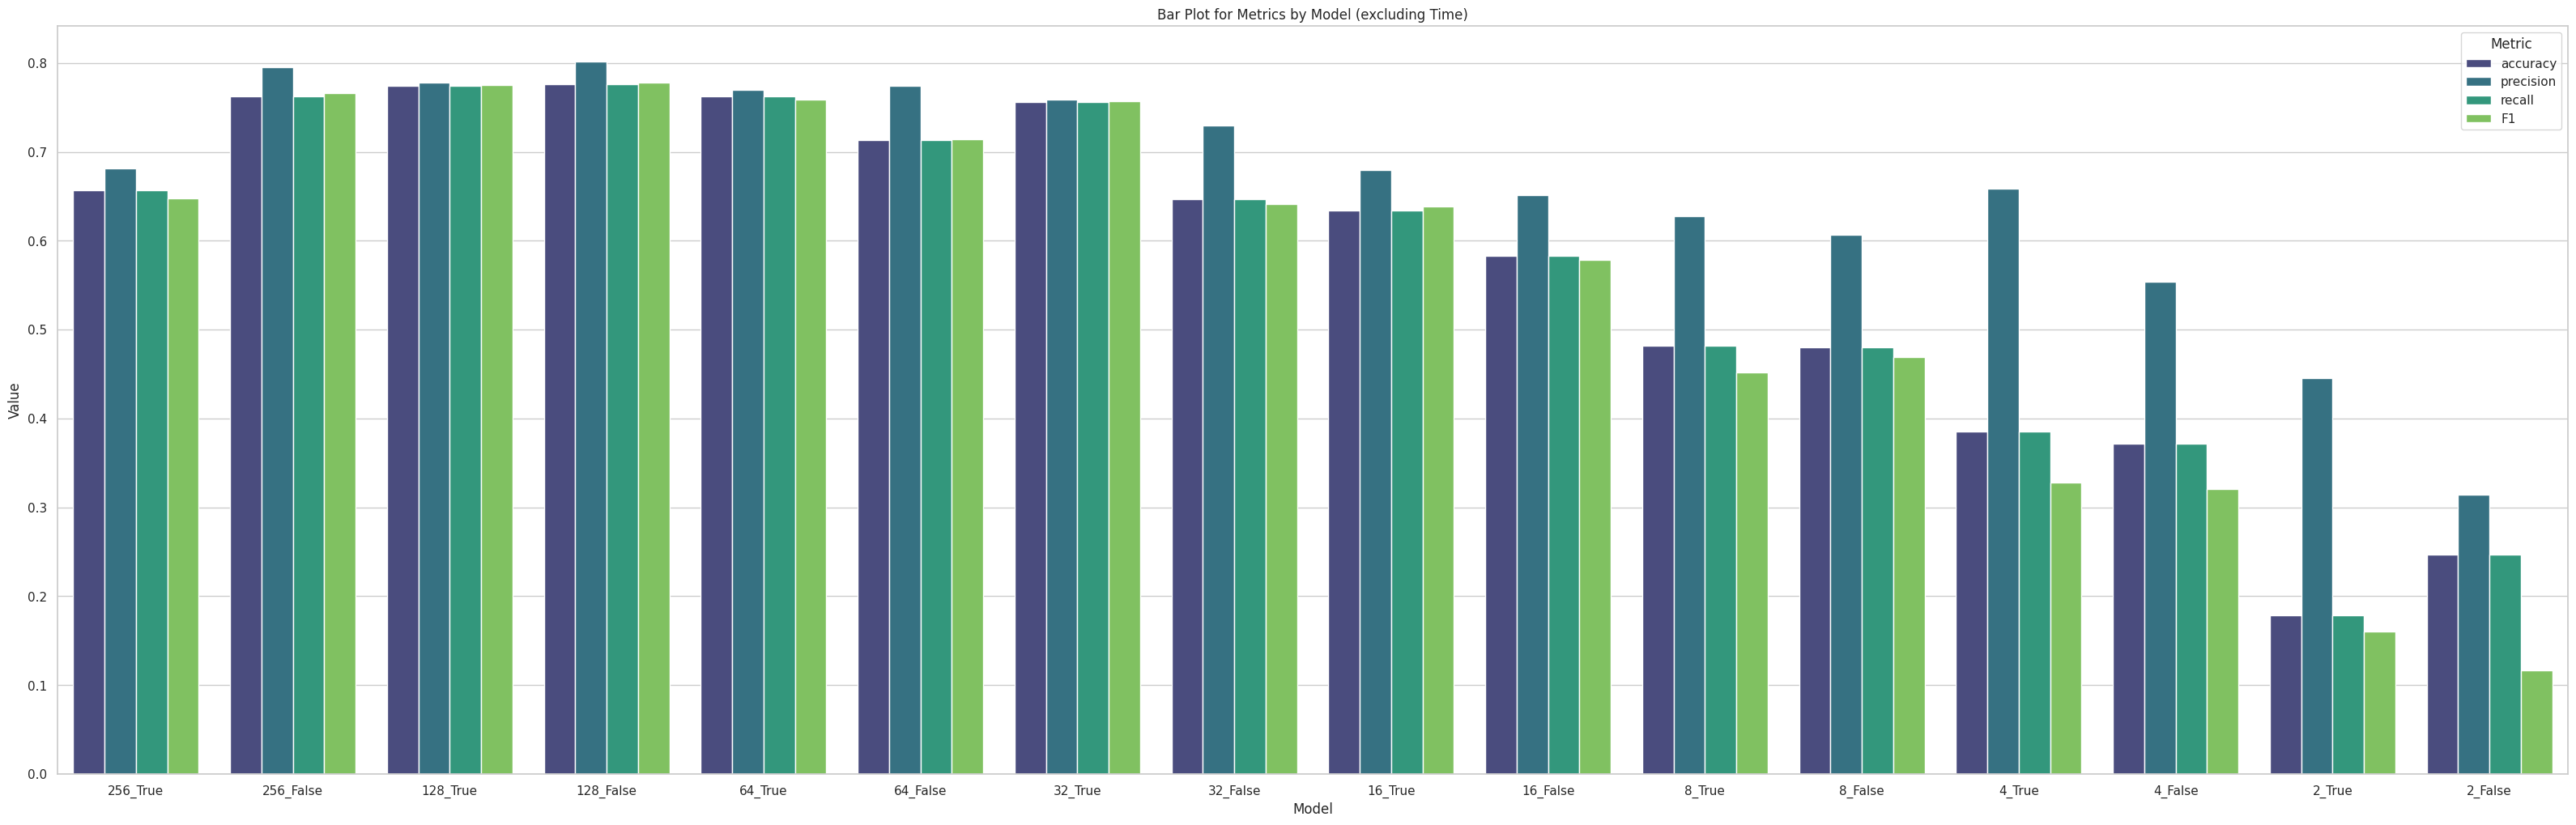

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data2 = results

df = pd.DataFrame(data2, columns=['Model', 'Metrics'])
df = pd.concat([df, pd.DataFrame(df['Metrics'].to_list(), columns=['accuracy', 'precision', 'recall', 'F1'])], axis=1)

df_metrics_melted = pd.melt(df, id_vars=['Model'], value_vars=['accuracy', 'precision', 'recall', 'F1'], var_name='Metric', value_name='Value')Ё
sns.set(style="whitegrid")
plt.figure(figsize=(40, 12))
ax1 = sns.barplot(x='Model', y='Value', hue='Metric', data=df_metrics_melted, palette='viridis')
plt.title('Bar Plot for Metrics by Model (excluding Time)')
plt.xlabel('Model')
plt.ylabel('Value')

plt.show()

In [15]:
results

[('256_True', [0.6567930489731437, 0.6817725, 0.65679306, 0.6476563]),
 ('256_False', [0.7627698788836229, 0.7955331, 0.7627699, 0.7665094]),
 ('128_True', [0.7740916271721959, 0.7779076, 0.7740916, 0.77488244]),
 ('128_False', [0.7761979989468141, 0.80161476, 0.77619797, 0.77814436]),
 ('64_True', [0.7622432859399684, 0.7697462, 0.7622433, 0.7589252]),
 ('64_False', [0.7128751974723538, 0.77415913, 0.7128752, 0.7144877]),
 ('32_True', [0.7559241706161137, 0.7589565, 0.75592417, 0.7565719]),
 ('32_False', [0.6469194312796208, 0.7298479, 0.6469194, 0.64163107]),
 ('16_True', [0.6340179041600843, 0.68003803, 0.6340179, 0.63859105]),
 ('16_False', [0.583464981569247, 0.6516936, 0.583465, 0.5788261]),
 ('8_True', [0.4820958399157451, 0.6278199, 0.48209584, 0.45161384]),
 ('8_False', [0.47972617166929965, 0.6064328, 0.47972617, 0.46923363]),
 ('4_True', [0.38572933122696157, 0.658313, 0.3857293, 0.32820678]),
 ('4_False', [0.37177461822011587, 0.55365205, 0.3717746, 0.3207851]),
 ('2_True',